###Importing Librabries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud,STOPWORDS

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.metrics import classification_report

from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manikannan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manikannan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


###Loading Data

In [2]:
df1 = pd.read_csv("Ev.csv")
df2 = pd.read_csv("ev1.csv")

In [3]:
df = pd.concat([df2,df1])

In [4]:
df.head()

,Article,Topic
0,An electric car is a car that is propelled by ...,Electric Car
1,Several countries have established government ...,Electric Aircraft
2,"The Tesla Model 3, which has a maximum range o...",Electric Car
3,"As of December 2019, the global stock of pure ...",Electric Car
4,Electric cars are a type of electric vehicle (...,Electric Aircraft


##Data Preprocessing

In [5]:
df.reset_index(inplace=True)
df = df.drop(['index'],axis=1)
df

,Article,Topic
0,An electric car is a car that is propelled by ...,Electric Car
1,Several countries have established government ...,Electric Aircraft
2,"The Tesla Model 3, which has a maximum range o...",Electric Car
3,"As of December 2019, the global stock of pure ...",Electric Car
4,Electric cars are a type of electric vehicle (...,Electric Aircraft
...,...,...
554,The following table presents global sales of t...,PlugInEv
555,The Mitsubishi Outlander P-HEV is the world's ...,PlugInEv
556,Ranking second is the Toyota Prius Plug-in Hyb...,PlugInEv
557,Combined global sales of the Chevrolet Volt an...,PlugInEv


<AxesSubplot:>

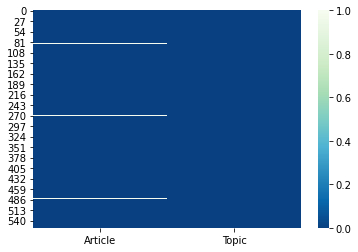

In [6]:
sns.heatmap(df.isnull(),cmap="GnBu_r")

In [7]:
df.dropna(inplace=True)

##Exploratory Data Analysis

In [8]:
df.describe().T

,count,unique,top,freq
Article,554,554,"However, nearly all the rare-earth elements in...",1
Topic,554,5,Electric Aircraft,182


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 0 to 558
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Article  554 non-null    object
 1   Topic    554 non-null    object
dtypes: object(2)
memory usage: 13.0+ KB


####Let's add a column as a part of Feature Engg to check the number of words in the Article

In [10]:
df['length'] = df['Article'].apply(len)
df

,Article,Topic,length
0,An electric car is a car that is propelled by ...,Electric Car,570
1,Several countries have established government ...,Electric Aircraft,357
2,"The Tesla Model 3, which has a maximum range o...",Electric Car,347
3,"As of December 2019, the global stock of pure ...",Electric Car,610
4,Electric cars are a type of electric vehicle (...,Electric Aircraft,599
...,...,...,...
554,The following table presents global sales of t...,PlugInEv,363
555,The Mitsubishi Outlander P-HEV is the world's ...,PlugInEv,453
556,Ranking second is the Toyota Prius Plug-in Hyb...,PlugInEv,375
557,Combined global sales of the Chevrolet Volt an...,PlugInEv,502


In [11]:
df.reset_index(inplace=True)
df = df.drop(['index'],axis=1)
df

,Article,Topic,length
0,An electric car is a car that is propelled by ...,Electric Car,570
1,Several countries have established government ...,Electric Aircraft,357
2,"The Tesla Model 3, which has a maximum range o...",Electric Car,347
3,"As of December 2019, the global stock of pure ...",Electric Car,610
4,Electric cars are a type of electric vehicle (...,Electric Aircraft,599
...,...,...,...
549,The following table presents global sales of t...,PlugInEv,363
550,The Mitsubishi Outlander P-HEV is the world's ...,PlugInEv,453
551,Ranking second is the Toyota Prius Plug-in Hyb...,PlugInEv,375
552,Combined global sales of the Chevrolet Volt an...,PlugInEv,502


<AxesSubplot:ylabel='Frequency'>

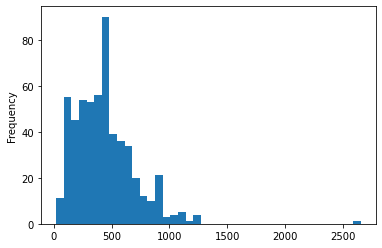

In [12]:
df['length'].plot(bins=40,kind='hist')

In [13]:
df.length.describe()

count     554.000000
mean      436.678700
std       259.907978
min        19.000000
25%       245.000000
50%       416.000000
75%       568.750000
max      2655.000000
Name: length, dtype: float64

####Well 2655 words in a Article, seems like a novel so let's try to remove that novel

In [14]:
df[df['length'] == 2655]

,Article,Topic,length
187,Some studies try to compare environmental impa...,Electric Aircraft,2655


In [15]:
df = df.drop([187])

###Label Encoder

In [16]:
df['Topic'] = LabelEncoder().fit_transform(df['Topic'])

###Train Test Split

In [17]:
X = df['Article'].values
Y = df['Topic'].values

In [18]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

###Text Preprocessing

In [19]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [20]:
def clean(doc):
  stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
  punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
  normalized = [lemma.lemmatize(word) for word in punc_free.split()]
  return normalized

###Text Vectorization

In [21]:
bow_trans = CountVectorizer().fit(x_train)
print(len(bow_trans.vocabulary_))

4764


In [22]:
ev_bow = bow_trans.transform(x_train)

In [23]:
ev_test = bow_trans.transform(x_test)

In [24]:
print('Shape of Sparse Matrix : ',ev_bow.shape)
print('Amount of non-zero occurences : ',ev_bow.nnz)

Shape of Sparse Matrix :  (442, 4764)
Amount of non-zero occurences :  22024


##Model Building

In [25]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
alpha = [0.1,1,3]
params = dict(alpha=alpha)
cv = KFold(n_splits=10)
grid  = GridSearchCV(clf,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)
grid.fit(ev_bow,y_train)
print('Best Score is {} and Best params are {}'.format(grid.best_score_,grid.best_params_))

Best Score is 0.6334848484848485 and Best params are {'alpha': 1}


In [26]:
clf = MultinomialNB(alpha=1)
clf.fit(ev_bow,y_train)
y_pred_test = clf.predict(ev_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.64      0.91      0.75        32
           1       0.67      0.35      0.46        17
           2       0.00      0.00      0.00         7
           3       0.61      0.63      0.62        27
           4       0.69      0.71      0.70        28

    accuracy                           0.65       111
   macro avg       0.52      0.52      0.51       111
weighted avg       0.61      0.65      0.62       111



In [27]:
from sklearn.svm import SVC
clf2 = SVC()
kernel = ['rbf','poly']
C = [50,10,1,0.1]
gamma = ['auto','scale']
params = dict(kernel=kernel,C=C,gamma=gamma)
cv = KFold(n_splits=5)
grid  = GridSearchCV(clf2,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)
grid.fit(ev_bow,y_train)
print('Best Score is {} and Best params are {}'.format(grid.best_score_,grid.best_params_))

Best Score is 0.6514300306435138 and Best params are {'C': 50, 'gamma': 'auto', 'kernel': 'rbf'}


In [28]:
clf2 = SVC(C=50,kernel='rbf',gamma='scale')
clf2.fit(ev_bow,y_train)
y_pred_test2 = clf2.predict(ev_test)
print(classification_report(y_test,y_pred_test2))

              precision    recall  f1-score   support

           0       0.69      0.91      0.78        32
           1       0.50      0.59      0.54        17
           2       0.40      0.29      0.33         7
           3       0.68      0.56      0.61        27
           4       0.77      0.61      0.68        28

    accuracy                           0.66       111
   macro avg       0.61      0.59      0.59       111
weighted avg       0.66      0.66      0.65       111



In [29]:
from sklearn.ensemble import RandomForestClassifier
clf3 = RandomForestClassifier()
n_estimators = [50,100,200,500]
max_depth = [50,100,200]
params = dict(n_estimators=n_estimators,max_depth=max_depth)
cv = KFold(n_splits=5)
grid  = GridSearchCV(clf3,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)
grid.fit(ev_bow,y_train)
print('Best Score is {} and Best params are {}'.format(grid.best_score_,grid.best_params_))

Best Score is 0.6991573033707864 and Best params are {'max_depth': 200, 'n_estimators': 500}


In [30]:
clf3 = RandomForestClassifier(n_estimators=100,max_depth=100)
clf3.fit(ev_bow,y_train)
y_pred_test3 = clf3.predict(ev_test)
print(classification_report(y_test,y_pred_test3))

              precision    recall  f1-score   support

           0       0.64      0.94      0.76        32
           1       0.61      0.65      0.63        17
           2       0.50      0.14      0.22         7
           3       0.86      0.67      0.75        27
           4       0.83      0.68      0.75        28

    accuracy                           0.71       111
   macro avg       0.69      0.61      0.62       111
weighted avg       0.73      0.71      0.70       111



In [31]:
from sklearn.ensemble import BaggingClassifier
clf4 = BaggingClassifier()
params = {'n_estimators':[10,50,100,200]}
cv = KFold(n_splits=5)
grid  = GridSearchCV(clf4,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)
grid.fit(ev_bow,y_train)
print('Best Score is {} and Best params are {}'.format(grid.best_score_,grid.best_params_))

Best Score is 0.787385086823289 and Best params are {'n_estimators': 50}


In [32]:
clf4 = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100)
clf4.fit(ev_bow,y_train)
y_pred_test4 = clf4.predict(ev_test)
print(classification_report(y_test,y_pred_test4))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        32
           1       0.58      0.65      0.61        17
           2       0.40      0.57      0.47         7
           3       0.95      0.74      0.83        27
           4       0.86      0.86      0.86        28

    accuracy                           0.80       111
   macro avg       0.74      0.75      0.74       111
weighted avg       0.82      0.80      0.81       111



In [33]:
from sklearn.tree import DecisionTreeClassifier
clf5 = DecisionTreeClassifier()
params = {'criterion':['gini','entropy'],'max_depth':[50,100,200]}
cv = KFold(n_splits=5)
grid  = GridSearchCV(clf5,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)
grid.fit(ev_bow,y_train)
print('Best Score is {} and Best params are {}'.format(grid.best_score_,grid.best_params_))

Best Score is 0.7308478038815117 and Best params are {'criterion': 'gini', 'max_depth': 50}


In [34]:
clf5 = DecisionTreeClassifier(criterion='entropy',max_depth=100)
clf5.fit(ev_bow,y_train)
y_pred_test5 = clf5.predict(ev_test)
print(classification_report(y_test,y_pred_test5))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        32
           1       0.58      0.88      0.70        17
           2       0.40      0.57      0.47         7
           3       0.94      0.59      0.73        27
           4       0.91      0.75      0.82        28

    accuracy                           0.76       111
   macro avg       0.73      0.73      0.71       111
weighted avg       0.80      0.76      0.76       111



In [35]:
from sklearn.ensemble import AdaBoostClassifier
clf6 = AdaBoostClassifier()
params = {'n_estimators':[50,100,200],'learning_rate':[0.1,1]}
cv = KFold(n_splits=5)
grid  = GridSearchCV(clf6,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)
grid.fit(ev_bow,y_train)
print('Best Score is {} and Best params are {}'.format(grid.best_score_,grid.best_params_))

Best Score is 0.6154239019407558 and Best params are {'learning_rate': 0.1, 'n_estimators': 200}


In [36]:
clf6 = AdaBoostClassifier(n_estimators=100)
clf6.fit(ev_bow,y_train)
y_pred_test6 = clf6.predict(ev_test)
print(classification_report(y_test,y_pred_test6))

              precision    recall  f1-score   support

           0       0.55      0.50      0.52        32
           1       0.25      0.59      0.35        17
           2       0.00      0.00      0.00         7
           3       0.94      0.63      0.76        27
           4       0.86      0.68      0.76        28

    accuracy                           0.56       111
   macro avg       0.52      0.48      0.48       111
weighted avg       0.64      0.56      0.58       111



In [37]:
from sklearn.ensemble import GradientBoostingClassifier
clf7 = GradientBoostingClassifier()
params = {'n_estimators':[50,100,200],'learning_rate':[0.1,1,10],'loss':['exponential','deviance']}
cv = KFold(n_splits=5)
grid  = GridSearchCV(clf7,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)
grid.fit(ev_bow,y_train)
print('Best Score is {} and Best params are {}'.format(grid.best_score_,grid.best_params_))

Best Score is 0.748876404494382 and Best params are {'learning_rate': 0.1, 'loss': 'deviance', 'n_estimators': 50}


In [ ]:
clf7 = GradientBoostingClassifier(loss='deviance',n_estimators=50,learning_rate=0.1)
clf7.fit(ev_bow,y_train)
y_pred_test7 = clf7.predict(ev_test)
print(classification_report(y_test,y_pred_test7))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79        20
           1       0.47      0.33      0.39        21
           2       0.45      0.48      0.47        21
           3       0.83      0.74      0.78        27
           4       0.68      0.85      0.76        20

    accuracy                           0.65       109
   macro avg       0.63      0.65      0.64       109
weighted avg       0.64      0.65      0.64       109



In [38]:
from xgboost import XGBClassifier
clf8 = XGBClassifier()
params = {'n_estimators': [50,100,200], "learning_rate" : [0.1,1], "max_depth" : [10,50,100]}
cv = KFold(n_splits=5)
grid  = GridSearchCV(clf8,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)
grid.fit(ev_bow,y_train)
print('Best Score is {} and Best params are {}'.format(grid.best_score_,grid.best_params_))


[16:13:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Score is 0.77597037793667 and Best params are {'learning_rate': 0.1, 'max_depth': 50, 'n_estimators': 100}


In [39]:
clf8 = XGBClassifier()
clf8.fit(ev_bow,y_train)
y_pred_test8 = clf8.predict(ev_test)
print(classification_report(y_test,y_pred_test8))

[16:13:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.56      0.59      0.57        17
           2       0.38      0.43      0.40         7
           3       0.90      0.67      0.77        27
           4       0.81      0.89      0.85        28

    accuracy                           0.77       111
   macro avg       0.70      0.70      0.69       111
weighted avg       0.78      0.77      0.77       111



###Pipelining the Process


In [48]:
from sklearn.pipeline import Pipeline
clf_1 = Pipeline([('vect',CountVectorizer(analyzer=clean)),
                     ('tfidf',TfidfTransformer()),
                     ('clf',MultinomialNB()),         
                    ])
clf_1.fit(x_train,y_train)
predicted = clf_1.predict(x_test)
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.48      0.94      0.64        32
           1       0.67      0.12      0.20        17
           2       0.00      0.00      0.00         7
           3       0.58      0.26      0.36        27
           4       0.59      0.71      0.65        28

    accuracy                           0.53       111
   macro avg       0.46      0.41      0.37       111
weighted avg       0.53      0.53      0.46       111



In [49]:
clf_2 = Pipeline([('vect',CountVectorizer(analyzer=clean)),
                     ('tfidf',TfidfTransformer()),
                     ('clf',SVC()),         
                    ])
clf_2.fit(x_train,y_train)
predicted = clf_2.predict(x_test)
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.54      0.97      0.70        32
           1       0.56      0.29      0.38        17
           2       0.00      0.00      0.00         7
           3       0.68      0.63      0.65        27
           4       0.85      0.61      0.71        28

    accuracy                           0.63       111
   macro avg       0.53      0.50      0.49       111
weighted avg       0.62      0.63      0.60       111



In [50]:
clf_3 = Pipeline([('vect',CountVectorizer(analyzer=clean)),
                     ('tfidf',TfidfTransformer()),
                     ('clf',DecisionTreeClassifier()),         
                    ])
clf_3.fit(x_train,y_train)
predicted = clf_3.predict(x_test)
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.68      0.78      0.72        32
           1       0.42      0.47      0.44        17
           2       0.22      0.29      0.25         7
           3       0.75      0.56      0.64        27
           4       0.65      0.61      0.63        28

    accuracy                           0.60       111
   macro avg       0.54      0.54      0.54       111
weighted avg       0.62      0.60      0.61       111



In [51]:
clf_4 = Pipeline([('vect',CountVectorizer(analyzer=clean)),
                     ('tfidf',TfidfTransformer()),
                     ('clf',RandomForestClassifier()),         
                    ])
clf_4.fit(x_train,y_train)
predicted = clf_4.predict(x_test)
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.63      0.91      0.74        32
           1       0.50      0.47      0.48        17
           2       0.00      0.00      0.00         7
           3       0.74      0.63      0.68        27
           4       0.80      0.71      0.75        28

    accuracy                           0.67       111
   macro avg       0.53      0.54      0.53       111
weighted avg       0.64      0.67      0.64       111



In [52]:
clf_5 = Pipeline([('vect',CountVectorizer(analyzer=clean)),
                     ('tfidf',TfidfTransformer()),
                     ('clf',AdaBoostClassifier()),         
                    ])
clf_5.fit(x_train,y_train)
predicted = clf_5.predict(x_test)
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.50      0.84      0.63        32
           1       0.09      0.06      0.07        17
           2       0.00      0.00      0.00         7
           3       0.89      0.63      0.74        27
           4       0.68      0.54      0.60        28

    accuracy                           0.54       111
   macro avg       0.43      0.41      0.41       111
weighted avg       0.55      0.54      0.52       111



In [53]:
clf_6 = Pipeline([('vect',CountVectorizer(analyzer=clean)),
                     ('tfidf',TfidfTransformer()),
                     ('clf',GradientBoostingClassifier()),         
                    ])
clf_6.fit(x_train,y_train)
predicted = clf_6.predict(x_test)
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.72      0.91      0.81        32
           1       0.50      0.47      0.48        17
           2       0.00      0.00      0.00         7
           3       0.80      0.74      0.77        27
           4       0.76      0.79      0.77        28

    accuracy                           0.71       111
   macro avg       0.56      0.58      0.57       111
weighted avg       0.67      0.71      0.69       111



In [54]:
clf_7 = Pipeline([('vect',CountVectorizer(analyzer=clean)),
                     ('tfidf',TfidfTransformer()),
                     ('clf',BaggingClassifier()),         
                    ])
clf_7.fit(x_train,y_train)
predicted = clf_7.predict(x_test)
print(classification_report(y_test,predicted))


              precision    recall  f1-score   support

           0       0.72      0.88      0.79        32
           1       0.43      0.53      0.47        17
           2       0.50      0.14      0.22         7
           3       0.83      0.70      0.76        27
           4       0.81      0.75      0.78        28

    accuracy                           0.70       111
   macro avg       0.66      0.60      0.60       111
weighted avg       0.71      0.70      0.70       111



In [55]:
clf_7 = Pipeline([('vect',CountVectorizer(analyzer=clean)),
                     ('tfidf',TfidfTransformer()),
                     ('clf',XGBClassifier()),         
                    ])
clf_7.fit(x_train,y_train)
predicted = clf_7.predict(x_test)
print(classification_report(y_test,predicted))

[16:16:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        32
           1       0.48      0.59      0.53        17
           2       0.10      0.14      0.12         7
           3       0.76      0.70      0.73        27
           4       0.81      0.75      0.78        28

    accuracy                           0.69       111
   macro avg       0.61      0.60      0.60       111
weighted avg       0.73      0.69      0.71       111



###Saving Model

In [56]:
import pickle
pickle.dump(clf_6, open('clf_6.pickle','wb'))